# 🎯Anomaly Detection in Credit Card Transactions

### Importing Libraries

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import OneClassSVM
import math
from sklearn.decomposition import PCA

### Load Dataset

In [5]:
data = pd.read_csv('./creditcard.csv')

### EDA


In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
missing_values = data.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

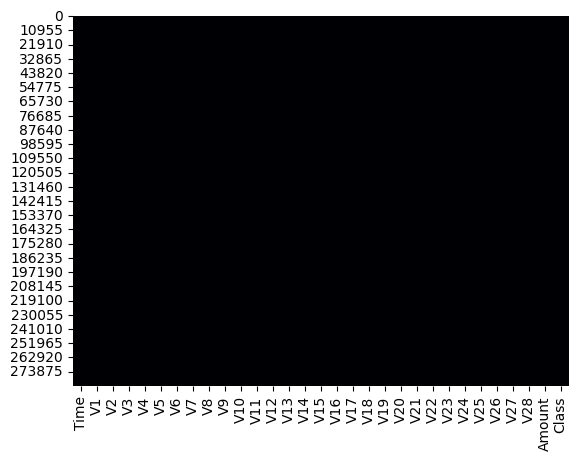

In [12]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

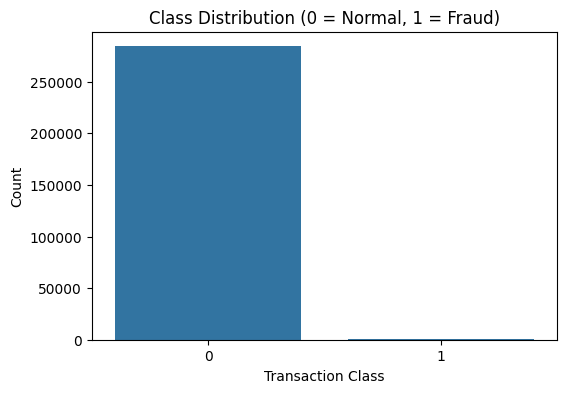

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

In [25]:
col = list(data.columns)

numerical_features = [col for col in data.columns if col not in [ 'Class']]
print('Numerical Features :',*numerical_features)

Numerical Features : Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount


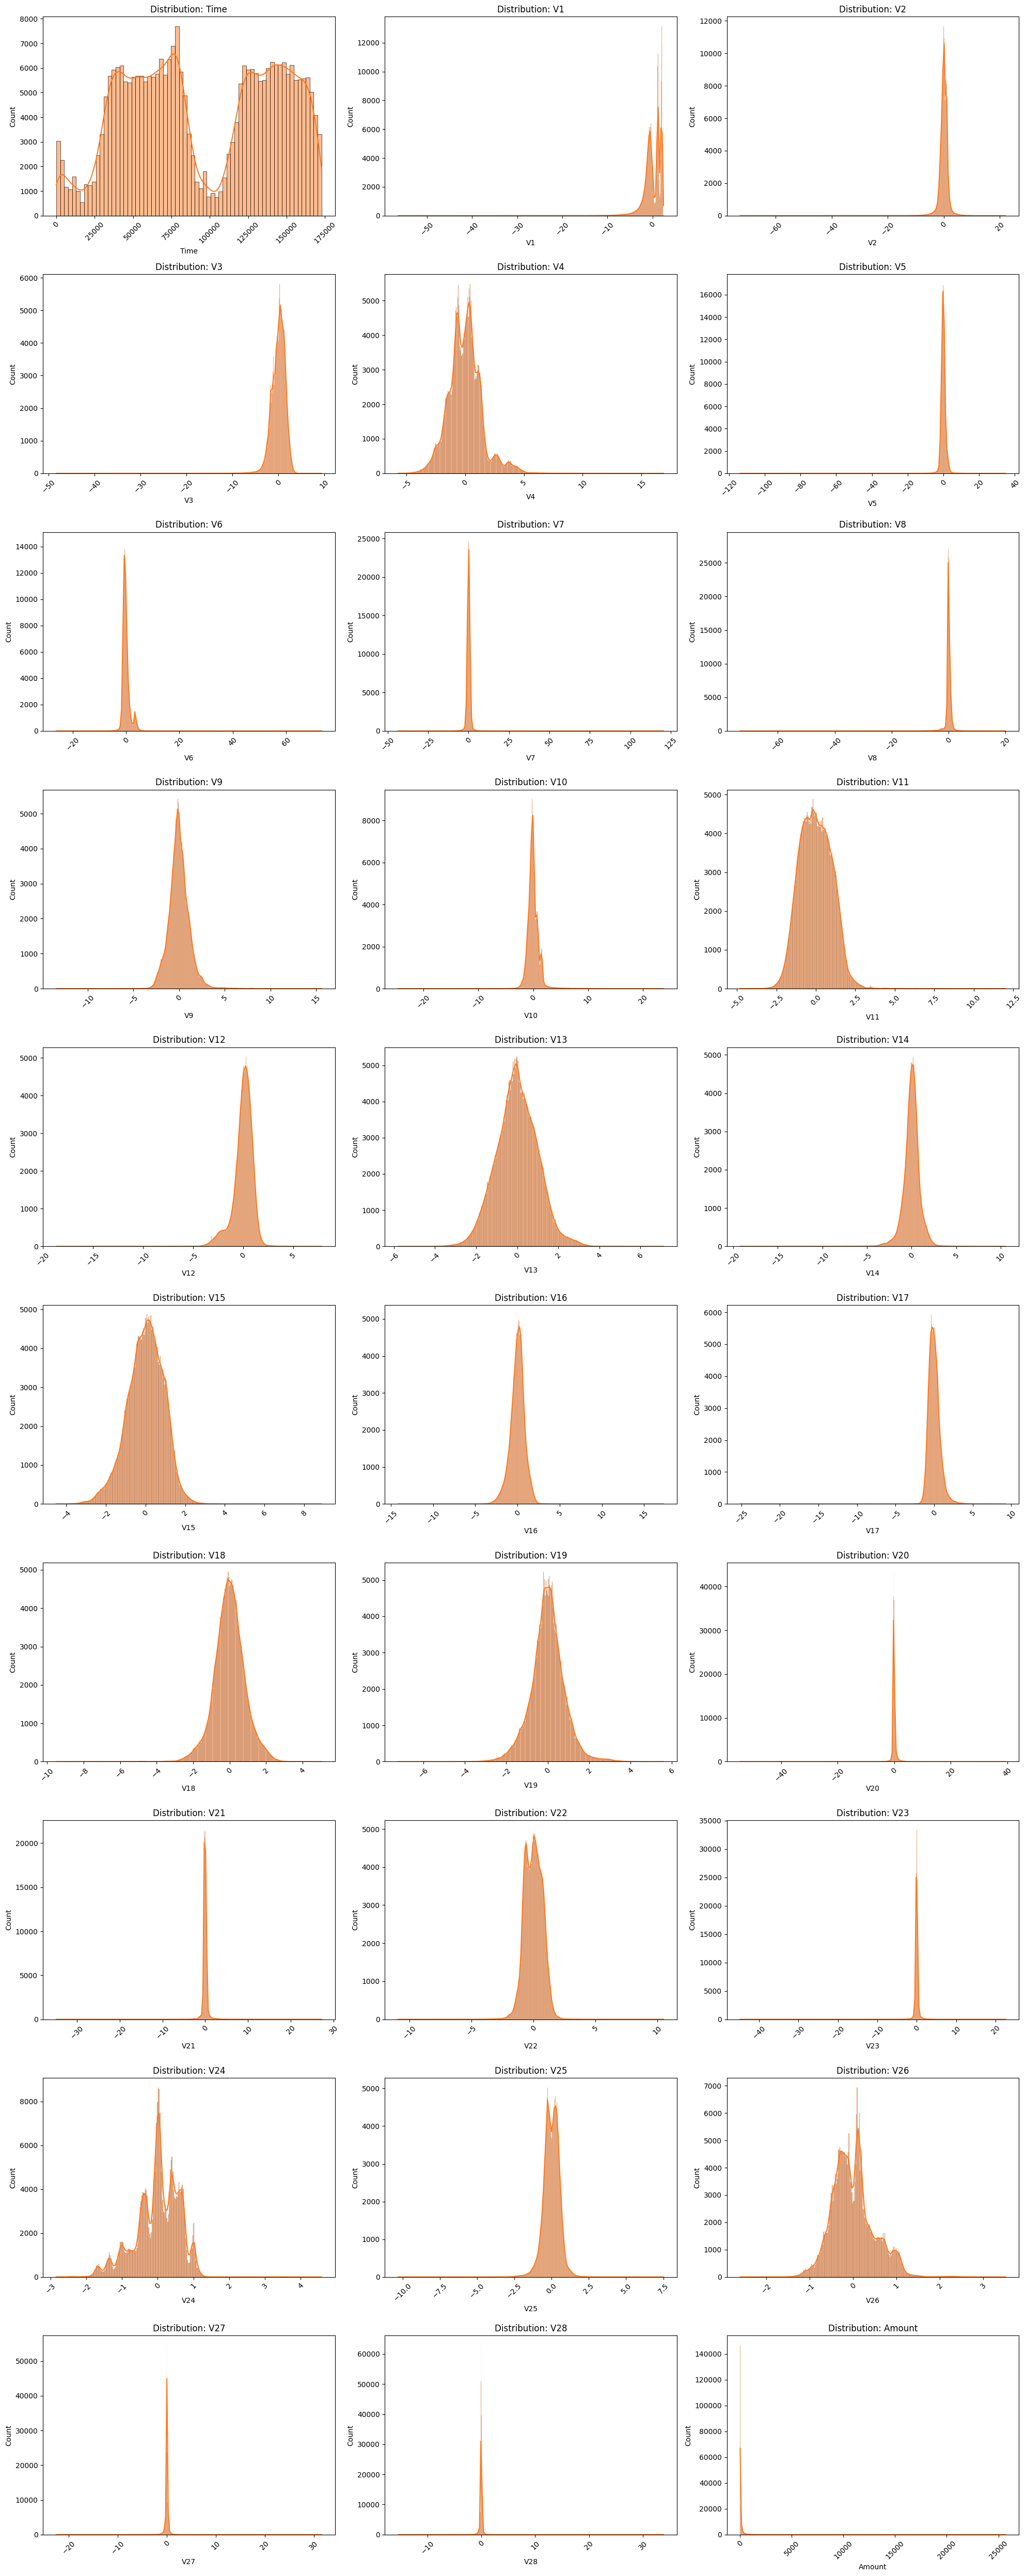

In [26]:
colors = ['#FF781F', '#2D2926']
n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        sns.histplot(data[feature], color=colors[0], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution: {feature}')
        axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

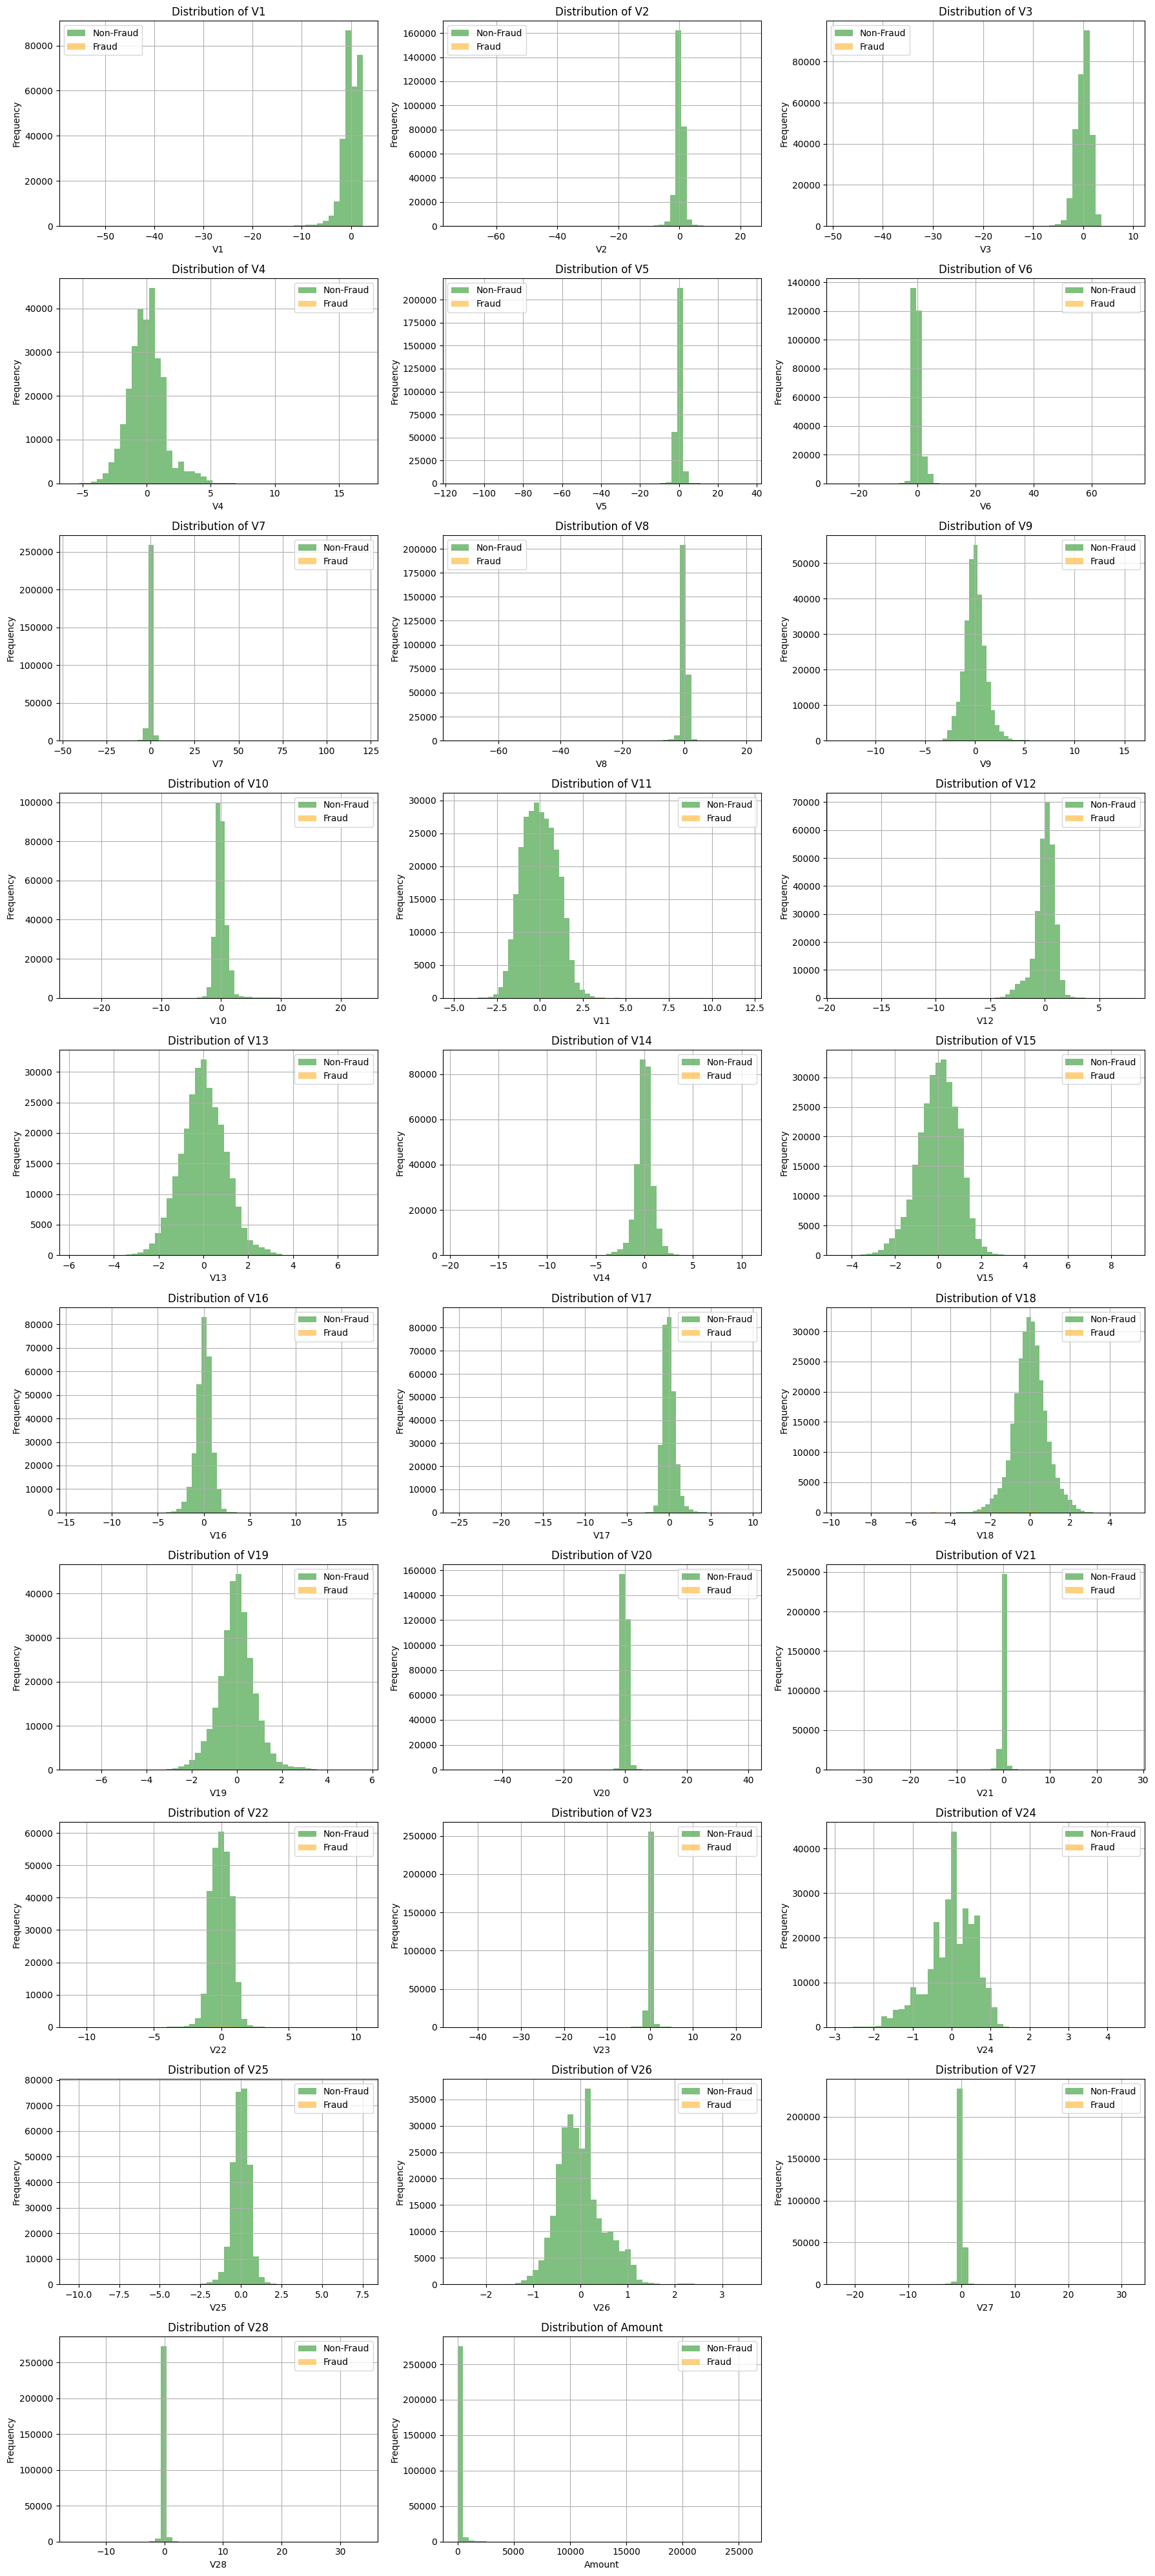

In [ ]:

# Select columns except 'Time' and 'Class'
cols_to_plot = [col for col in data.columns if col not in ['Time', 'Class']]
n = len(cols_to_plot)

# Set up subplot grid dimensions
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4))
axes = axes.flatten() 

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    data[data['Class'] == 0][col].hist(bins=50, alpha=0.5, label='Non-Fraud', color='green', ax=ax)
    data[data['Class'] == 1][col].hist(bins=50, alpha=0.5, label='Fraud', color='orange', ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Correlation Heatmap**

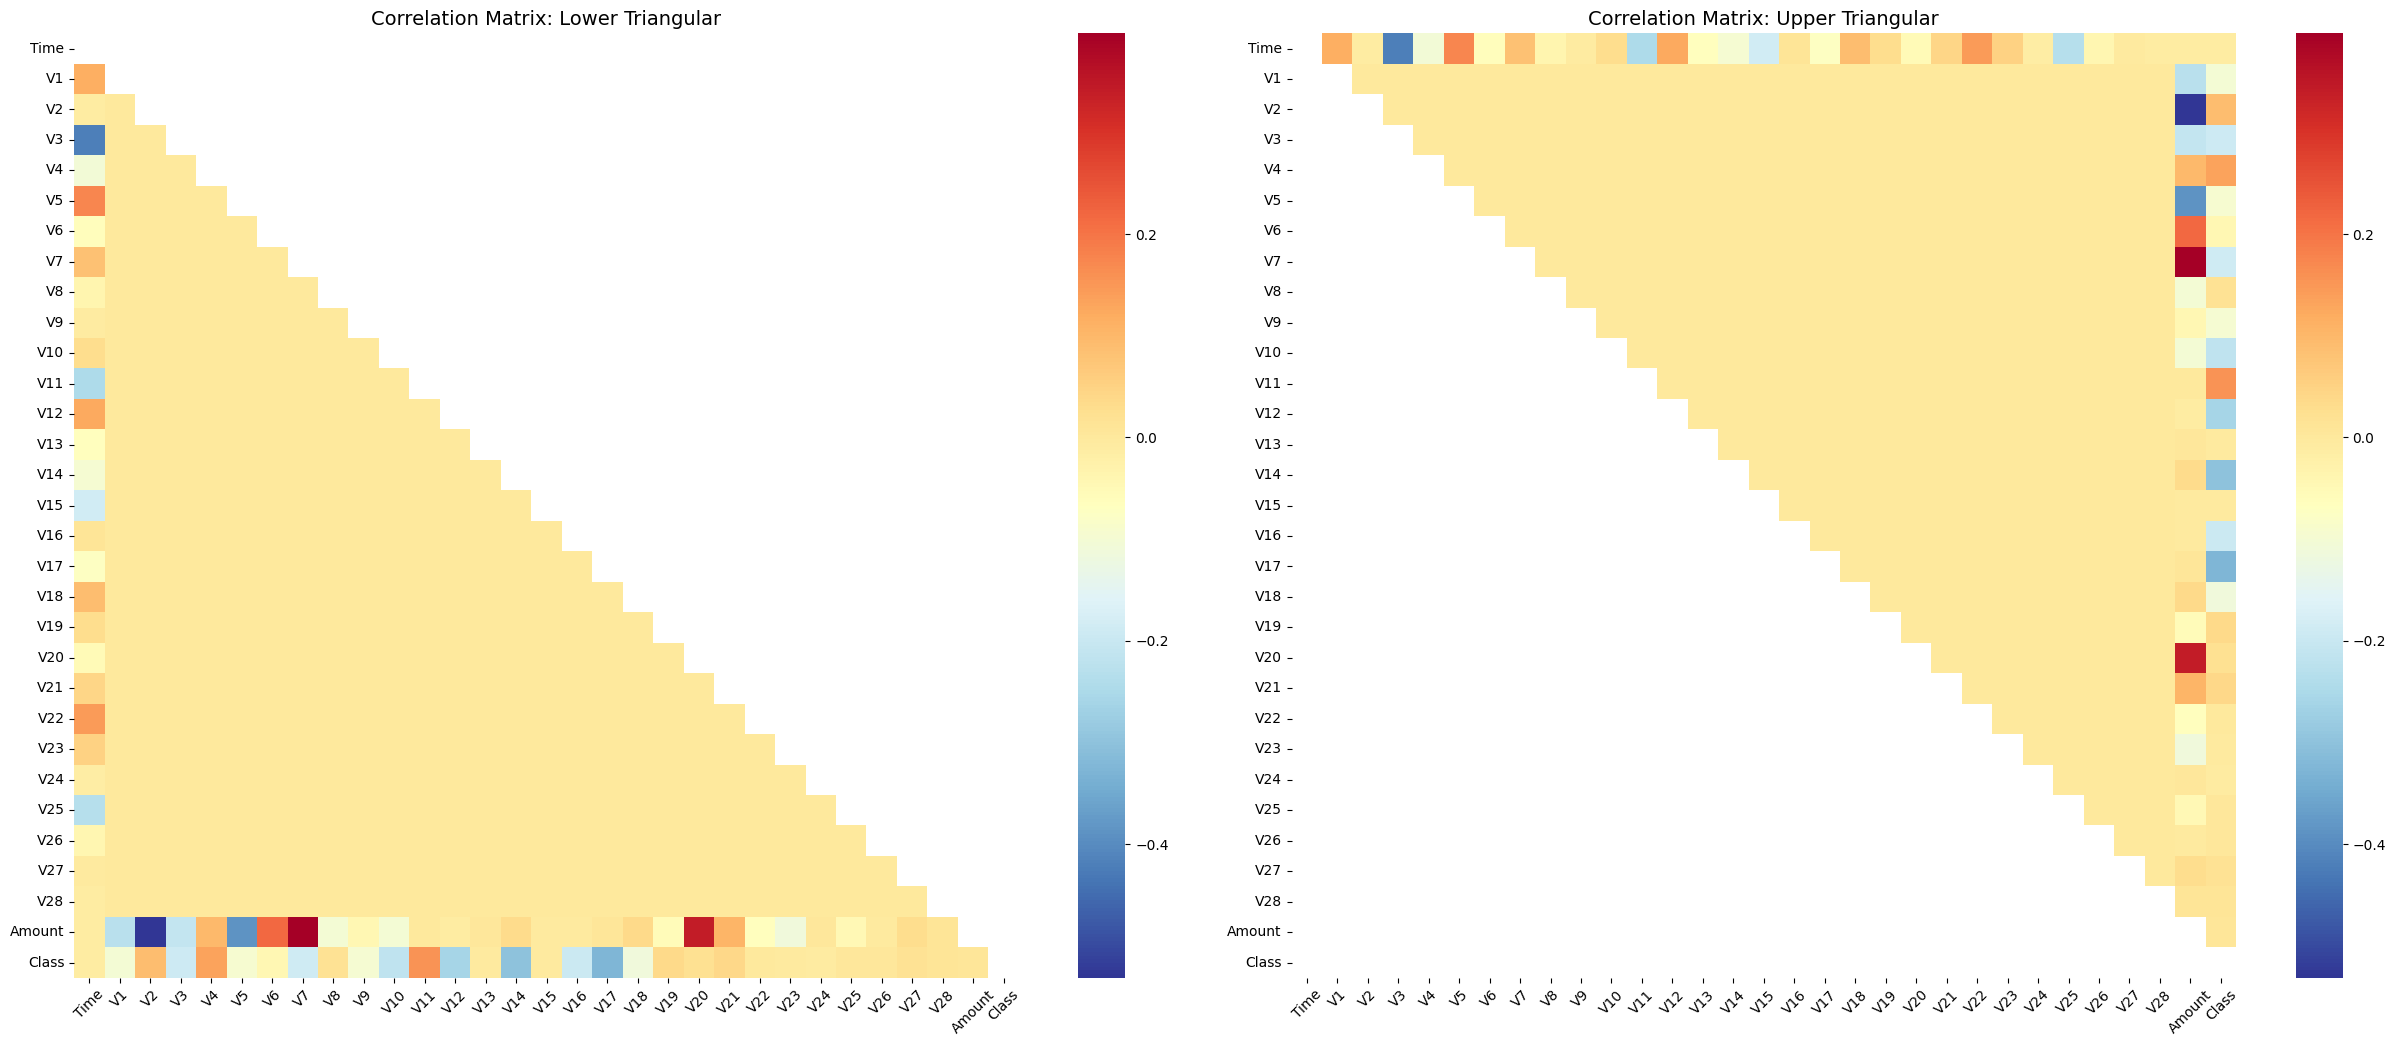

Top 10 absolute correlations (excluding self-correlation):
Amount - V2: 0.531
V2 - Amount: 0.531
V3 - Time: 0.420
Time - V3: 0.420
V7 - Amount: 0.397
Amount - V7: 0.397
Amount - V5: 0.386
V5 - Amount: 0.386
V20 - Amount: 0.339
Amount - V20: 0.339


In [ ]:
corr_matrix = data.corr()

# Create correlation heatmaps
ut = np.triu(np.ones_like(corr_matrix, dtype=bool))
lt = np.tril(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

# Upper triangular
plt.subplot(1, 2, 1)
sns.heatmap(
    corr_matrix,
    cmap='RdYlBu_r',
    annot=False,  
    cbar=True,
    mask=ut,
    fmt=".2f",
    square=True
)
plt.title('Correlation Matrix: Lower Triangular', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Lower triangular
plt.subplot(1, 2, 2)
sns.heatmap(
    corr_matrix,
    cmap='RdYlBu_r',
    annot=False,
    cbar=True,
    mask=lt,
    fmt=".2f",
    square=True
)
plt.title('Correlation Matrix: Upper Triangular', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()
corr_matrix_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
top_corr = corr_matrix_no_diag.abs().unstack().sort_values(ascending=False).dropna().head(10)
print("Top 10 absolute correlations (excluding self-correlation):")
for idx, value in top_corr.items():
    print(f"{idx[0]} - {idx[1]}: {value:.3f}")

### Preprocessing

In [34]:
df= data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Scale numerical values**

In [42]:
MmScaler = MinMaxScaler()

# Scale 'Amount' and 'Time'
df[['Time', 'Amount']] = MmScaler.fit_transform(df[['Time', 'Amount']])

In [43]:
df[['Amount', 'Time']].head()

,Amount,Time
0,0.005824,0.000000
1,0.000105,0.000000
2,0.014739,0.000006
3,0.004807,0.000006
4,0.002724,0.000012


**Apply dimensionality reduction**

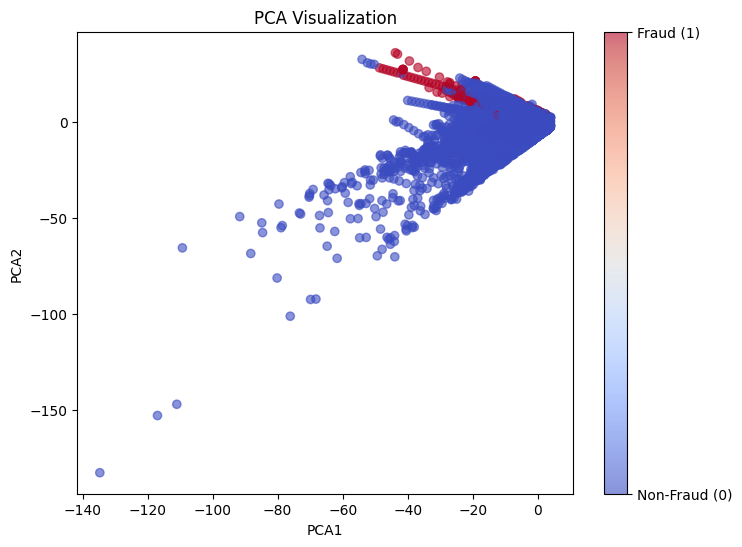

In [ ]:


features = data.drop(columns=['Class'], errors='ignore')  

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))

scatter = plt.scatter(data['PCA1'], data['PCA2'], c=data['Class'], cmap='coolwarm', alpha=0.6)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')

cbar = plt.colorbar(scatter, ticks=[0,1])
cbar.ax.set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.show()


### Unsupervised Techniques

***Isolation Forest:***

In [50]:
df1=df.copy()   
labels = df['Class']

In [55]:

# Train Isolation Forest on the full dataset (no labels)
iso_forest = IsolationForest(contamination=0.0017,     
    random_state=42    ) 
iso_forest.fit(df1.drop(columns=['Class'], errors='ignore'))  # approx. % of fraud

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred = iso_forest.predict(df1.drop(columns=['Class'], errors='ignore'))
# Convert to binary labels (1 = fraud, 0 = normal)
y_pred = np.where(y_pred == -1, 1, 0)

# Evaluate with true labels
print(classification_report(labels.astype(int), y_pred))
print(confusion_matrix(labels.astype(int), y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807

[[283955    360]
 [   367    125]]


### Isolation Forest Results Summary

- The model is excellent at identifying **normal transactions** (precision and recall ≈ **1.00**).

- It detects only about **25%** of fraud cases (**low recall**), and only **26%** of flagged frauds are true frauds (**low precision**).

- Many frauds are missed, and some normal transactions are wrongly flagged as fraud.

- This behavior is common in anomaly detection on imbalanced data — good at normal behavior but limited at spotting rare frauds.


***One Class SVM***

In [60]:
oc_svm = OneClassSVM(
    kernel='rbf',  
    gamma=0.01,    
    nu=0.007,    
)
oc_svm.fit(features)

# Predict anomalies
# Output: 1 for inliers, -1 for outliers
y_pred_oc = oc_svm.predict(features)
# Convert to 1=fraud, 0=normal
y_pred_oc = np.where(y_pred_oc == -1, 1, 0)

# Evaluation
print("Classification Report:")
print(classification_report(labels, y_pred_oc))
print("Confusion Matrix:")
print(confusion_matrix(labels, y_pred_oc))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.13      0.52      0.20       492

    accuracy                           0.99    284807
   macro avg       0.56      0.76      0.60    284807
weighted avg       1.00      0.99      1.00    284807

Confusion Matrix:
[[282576   1739]
 [   238    254]]


### One-Class SVM Results Summary

The model maintains **very high accuracy (~99%)** and performs well on the majority class (normal transactions).

**For normal transactions (class 0):**

- Precision is nearly **1.00** and recall is **0.99**, showing most normal transactions are correctly identified.

**For fraud transactions (class 1):**

- Recall is much higher than before at **0.52**, meaning the model detects over half of the fraud cases (significantly improved detection).
- Precision is low at **0.13**, so many flagged frauds are false positives.
- F1-score remains low (**0.20**), reflecting the imbalance between precision and recall.

**Confusion matrix shows:**

- **254** true positives (fraud detected) and **238** false negatives (fraud missed).
- **1,739** false positives (normal transactions flagged as fraud), higher than Isolation Forest’s false positives.


### Comparison Summary

- **Isolation Forest** :  
  - Fewer false positives  
  - Higher precision on fraud detection  
  - Detects fewer fraud cases (low recall)

- **One-Class SVM** :  
  - Detects more fraud cases (higher recall)  
  - Produces many more false positives (lower precision)
